In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob


sns.set_context("paper")
sns.set(font_scale = 1.6)
sns.set_style("white", {
    "font.family": "sans-serif",
    "font.serif": ['Helvetica'],
    "font.scale": 2
})
sns.set_style("ticks", {"xtick.major.size": 4,
                        "ytick.major.size": 4})

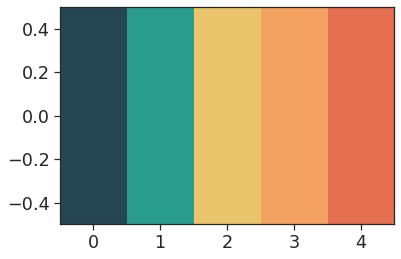

In [2]:
from matplotlib import colors
palette = ['#264653', '#2A9D8F','#E9C46A', '#F4A261', '#E76F51']
cmap = colors.ListedColormap(palette)

plt.imshow(np.arange(len(palette)).reshape(1, -1), aspect='auto', cmap=cmap,origin="lower")
plt.show()

In [4]:
exp = 'transformers/masked_auto_encoder_mask9'

training_file = f'/home/lugeon/eeg_project/scripts/training/representation/result/{exp}/loss.txt'
training_history = pd.read_csv(training_file, sep=' ')
training_history.head()

,epoch,training,validation
0,0,1.8985,1.8882
1,1,0.4399,0.3277
2,2,0.3051,0.2915
3,3,0.2819,0.2740
4,4,0.2683,0.2617


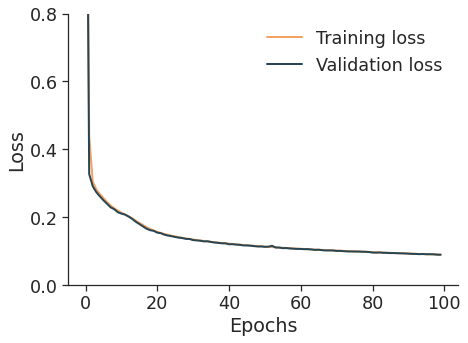

In [5]:
fig, ax = plt.subplots(figsize=(7, 5))

x = training_history.epoch

plt.plot(x, training_history.training, label='Training loss', color=cmap(3), linewidth=2)
plt.plot(x, training_history.validation, label='Validation loss', color=cmap(0), linewidth=2)

plt.legend(frameon=False)

plt.xlabel('Epochs')
plt.ylabel('Loss')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_ylim([0, 0.8])

plt.show()

### Architecture comparison

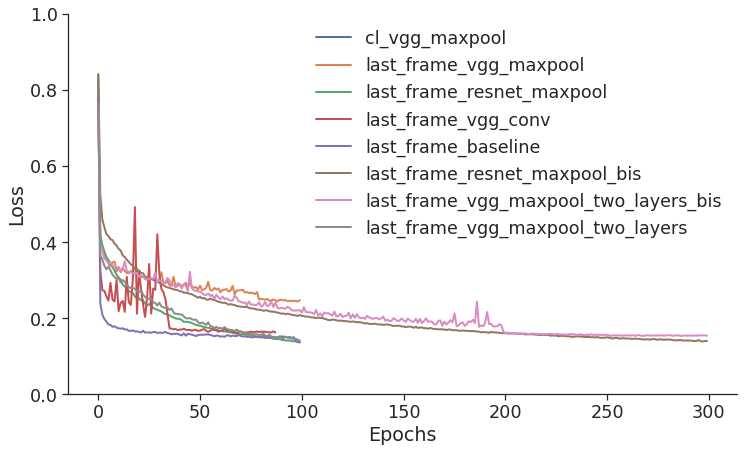

In [5]:
dir = '/home/lugeon/eeg_project/scripts/training/representation/result/arch_comparison/*'

fig, ax = plt.subplots(figsize=(12, 7))

for exp in glob.glob(dir):
    training_file = f'{exp}/loss.txt'
    training_history = pd.read_csv(training_file, sep=' ')
    training_history.head()
    
    x = training_history.epoch
    
    plt.plot(x, training_history.validation, 
             label=exp.split('/')[-1], linewidth=2)
    
plt.legend(frameon=False)

plt.xlabel('Epochs')
plt.ylabel('Loss')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_ylim([0, 1])

plt.show()
